
# Run calculations for anti-helium hydride ion (anti-HeH+).

## This represents an exotic antimatter system consisting of:
- Anti-helium nucleus (anti-alpha particle with charge -2)
- Anti-hydrogen nucleus (anti-proton with charge -1)
- 2 positrons (e+) to balance the -3 charge of the nuclei

It's the antimatter equivalent of the HeH+ ion (the first molecule
formed in the early universe). 

In [1]:

import numpy as np
import sys
import os
import time
import matplotlib.pyplot as plt



from antinature.core.molecular_data import MolecularData
from antinature.core.basis import MixedMatterBasis
from antinature.core.integral_engine import AntinatureIntegralEngine
from antinature.core.hamiltonian import AntinatureHamiltonian
from antinature.core.scf import AntinatureSCF
from antinature.core.correlation import AntinatureCorrelation


Qiskit successfully imported.
Primitives (Estimator) available.


In [ ]:

def run_anti_heh_ion():

    print("\n=== Anti-Helium Hydride Ion (anti-HeH+) Analysis ===\n")
    
    # Create anti-HeH+ system
    # The atoms list represents the nuclei positions, but they're anti-nuclei
    anti_heh_data = MolecularData(
        atoms=[
            ('He', np.array([0.0, 0.0, 0.0])),
            ('H', np.array([0.0, 0.0, 1.46]))  # ~1.46 Bohr ≈ 0.77 Å bond distance
        ],
        n_electrons=0,       # No electrons in antimatter system
        n_positrons=2,       # 2 positrons (equivalent to 2 electrons in normal HeH+)
        charge=0,            # Overall neutral (2 positrons balance -2 from anti-He, anti-H)
        name="Anti-HeH+",
        description="Anti-helium hydride ion (anti-HeH+) with exotic antimatter composition"
    )
    
    # Print molecular information
    print(f"Molecule: {anti_heh_data.name}")
    print(f"Description: {anti_heh_data.description}")
    print(f"Formula: {anti_heh_data.get_formula()}")
    print(f"Number of positrons: {anti_heh_data.n_positrons}")
    print(f"Nuclear repulsion energy: {anti_heh_data.get_nuclear_repulsion_energy():.8f} Hartree")
    
    # Create a basis set (use minimal for simplicity)
    basis = MixedMatterBasis()
    basis.create_for_molecule(
        atoms=anti_heh_data.atoms,
        e_quality='none',     # No electron basis needed
        p_quality='minimal'   # Minimal positron basis
    )
    
    # Print basis information
    p_basis_info = basis.positron_basis.get_function_types() if basis.positron_basis else {}
    print("\nBasis set information:")
    print(f"Positron basis functions: {len(basis.positron_basis) if basis.positron_basis else 0}")
    print(f"Positron function types: {p_basis_info}")
    
    # Create integral engine
    engine = AntinatureIntegralEngine()
    
    # Create Hamiltonian
    print("\nBuilding Hamiltonian...")
    t_start = time.time()
    hamiltonian = AntinatureHamiltonian(
        molecular_data=anti_heh_data,
        basis_set=basis,
        integral_engine=engine,
        include_relativistic=True  # Include relativistic effects for antimatter
    )
    
    # Build the Hamiltonian matrices
    h_matrices = hamiltonian.build_hamiltonian()
    t_hamiltonian = time.time() - t_start
    print(f"Hamiltonian built in {t_hamiltonian:.3f} seconds")
    
    # Create SCF solver
    print("\nStarting SCF calculation...")
    t_start = time.time()
    scf = AntinatureSCF(
        hamiltonian=h_matrices,
        basis_set=basis,
        molecular_data=anti_heh_data,
        max_iterations=50,
        convergence_threshold=1e-6,
        use_diis=True,
        damping_factor=0.5,
        print_level=1
    )
    
    # Run SCF calculation
    scf_results = scf.solve_scf()
    t_scf = time.time() - t_start
    print(f"SCF completed in {t_scf:.3f} seconds")
    
    # Print SCF results
    print(f"\nSCF energy: {scf_results['energy']:.10f} Hartree")
    print(f"Convergence: {scf_results['converged']}")
    print(f"Iterations: {scf_results['iterations']}")
    
    # Try correlation calculations
    print("\nStarting correlation calculations...")
    t_start = time.time()
    try:
        # Create correlation object
        corr = AntinatureCorrelation(
            scf_result=scf_results,
            hamiltonian=h_matrices,
            basis_set=basis,
            molecular_data=anti_heh_data,
            method="MP2"  # Use MP2 for correlation
        )
        
        # Run correlation calculation
        corr_results = corr.compute_correlation()
        t_corr = time.time() - t_start
        print(f"Correlation completed in {t_corr:.3f} seconds")
        
        # Print correlation results
        print(f"\nMP2 correlation energy: {corr_results['correlation_energy']:.10f} Hartree")
        print(f"Total MP2 energy: {corr_results['total_energy']:.10f} Hartree")
        
    except Exception as e:
        print(f"\nError in correlation calculation: {e}")
    
    # Visualize the system
    print("\nVisualizing anti-HeH+ system...")
    anti_heh_data.visualize(show_bonds=True)
    
    return {
        'molecule': anti_heh_data,
        'scf_results': scf_results,
        'correlation_results': corr_results if 'corr_results' in locals() else None
    }



In [3]:
def main():
    """Run all anti-HeH+ examples."""
    results = run_anti_heh_ion()
    
    # Save results plot
    plt.figure(figsize=(10, 6))
    plt.title("Anti-HeH+ Energy Levels")
    plt.xlabel("Orbital")
    plt.ylabel("Energy (Hartree)")
    
    # Plot positron energies if available
    if 'E_positron' in results['scf_results']:
        energies = results['scf_results']['E_positron']
        plt.plot(range(len(energies)), energies, 'ro-', label='Positron Orbitals')
        plt.legend()
    
    # Save the plot
    os.makedirs('results', exist_ok=True)
    plt.savefig(os.path.join('results', 'anti_heh_energies.png'))
    print(f"Results saved to results/anti_heh_energies.png")




=== Anti-Helium Hydride Ion (anti-HeH+) Analysis ===

Molecule: Anti-HeH+
Description: Anti-helium hydride ion (anti-HeH+) with exotic antimatter composition
Formula: HHe(e+2)
Number of positrons: 2
Nuclear repulsion energy: 1.36986301 Hartree

Basis set information:
Positron basis functions: 2
Positron function types: {'s': 2}

Building Hamiltonian...
Hamiltonian built in 0.001 seconds

Starting SCF calculation...
Iteration 1: Energy = 6.3009860453, ΔE = 6.3009860453, Error = 0.0000000000
Iteration 2: Energy = 6.3006864840, ΔE = 0.0002995614, Error = 0.0000000000
Iteration 3: Energy = 6.3004692209, ΔE = 0.0002172630, Error = 0.0000000000
Iteration 4: Energy = 6.3003255183, ΔE = 0.0001437026, Error = 0.0211447725
Iteration 5: Energy = 6.3002402510, ΔE = 0.0000852673, Error = 0.0152474524
Iteration 6: Energy = 6.3001792168, ΔE = 0.0000610342, Error = 0.0076167459
Iteration 7: Energy = 6.3001441565, ΔE = 0.0000350604, Error = 0.0038170618
Iteration 8: Energy = 6.3001254942, ΔE = 0.00001

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/antinature/core/basis.py:253: UserWarning: No basis parameters available for He with quality none
  warnings.warn(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/antinature/core/basis.py:253: UserWarning: No basis parameters available for H with quality none
  warnings.warn(


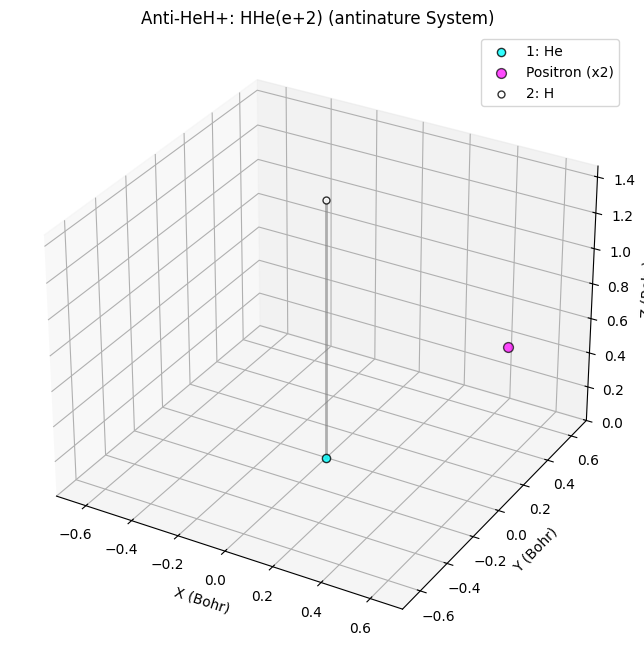

Results saved to results/anti_heh_energies.png


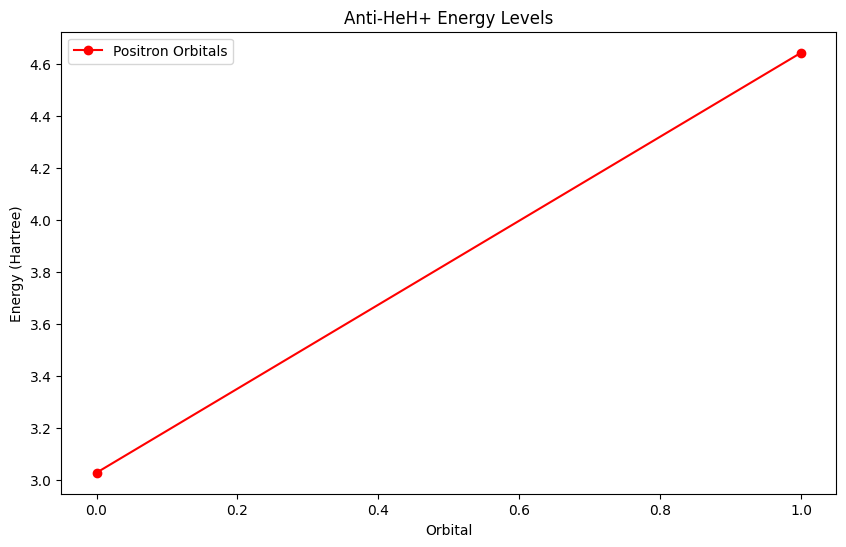

In [4]:
if __name__ == "__main__":
    main() 